In [3]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

def histogram_equalization(image, nbr_bins= 256):
    #dam bao hinh anh dau vao la anh xam
    if image.mode != 'L':
        image = image.convert('L')

    #chuyen doi hinh anh thanh mang Numpy
    image_array = np.array(image)

    #tinh toan histogram cua anh
    histogram, bins = np.histogram(image_array, bins= nbr_bins, range = (0, 256), density= True)

    #tinh toan ham phan phoi tich luy (CDF - Cumulative Distribution Function)
    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    #lay gia tri moi cho tung pixel dua tren CDF
    image_equalized = np.interp(image_array, bins[:-1], cdf)

    #chuyen doi mang ket qua thanh hinh anh
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image

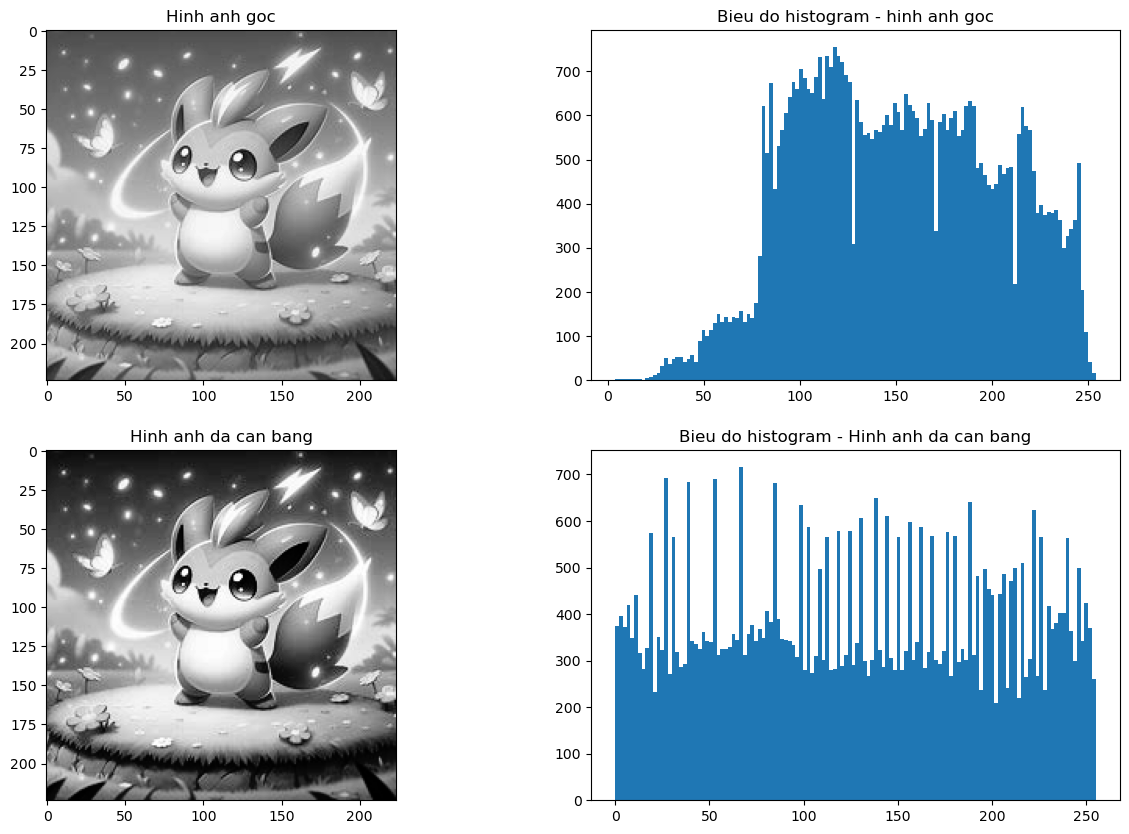

In [8]:
#doc hinh anh tu tep
my_path = 'C:/Users/quocl/anacondaPicture/pic8.jpg'
image = Image.open(my_path)

#ap dung can bang luoc do anh xam
equalized_image = histogram_equalization(image)

#tao mot luoi 2x2 de hien thi hinh anh va bieu do
plt.figure(figsize= (15, 10))

#hien thi hinh anh goc 
plt.subplot(2, 2, 1)
plt.imshow(image.convert('L'), cmap= 'gray')
plt.title('Hinh anh goc')

#ve bieu do histogram cua hinh anh goc 
plt.subplot(2, 2, 2)
plt.hist(np.array(image.convert('L')).flatten(), bins = 128)
plt.title('Bieu do histogram - hinh anh goc')

#Hien thi hinh anh da can bang
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap= 'gray')
plt.title('Hinh anh da can bang')

#ve bieu do histogram cua hinh anh da can bang
plt.subplot(2, 2, 4)
plt.hist(np.array(equalized_image).flatten(), bins = 128)
plt.title('Bieu do histogram - Hinh anh da can bang')

plt.show()       